Q1: Outlier Detection & Feature Reduction

In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold


df = pd.read_csv("patient_data.csv")


num = df.select_dtypes(include=[np.number])
vt = VarianceThreshold()
num_selected = num[num.columns[vt.fit(num).get_support()]]
df = pd.concat([num_selected, df.select_dtypes(exclude=[np.number])], axis=1)


Q1 = df['CholesterolLevel'].quantile(0.25)
Q3 = df['CholesterolLevel'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['CholesterolLevel'] >= Q1 - 1.5*IQR) & (df['CholesterolLevel'] <= Q3 + 1.5*IQR)]


df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(method='ffill', inplace=True)

df.head()


C:\Users\DELL\AppData\Local\Temp\ipykernel_1728\2400404937.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,PatientID,Age,CholesterolLevel,BloodPressure,Gender,Region,RiskCategory
0,1,37,193.4,129.4,Male,East,High
1,2,45,210.7,107.1,Female,West,Low
2,3,63,244.3,103.9,Male,West,Low
3,4,53,184.5,127.2,Male,West,High
4,5,29,175.7,116.6,Male,South,High


Q2: Data Visualization

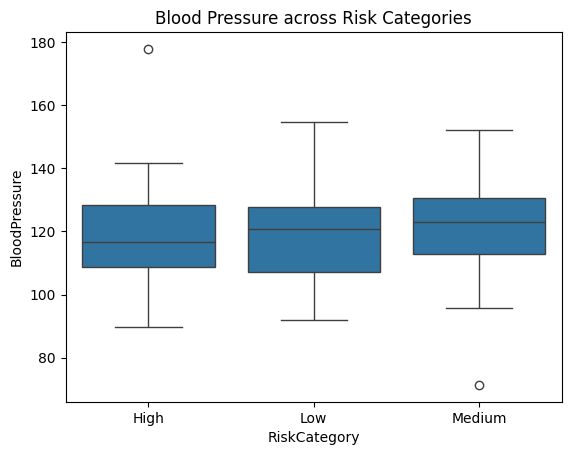

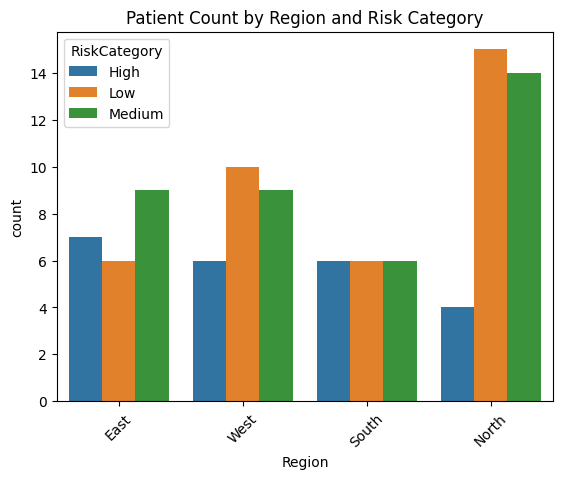

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='RiskCategory', y='BloodPressure', data=df)
plt.title("Blood Pressure across Risk Categories")
plt.show()

sns.countplot(data=df, x='Region', hue='RiskCategory')
plt.title("Patient Count by Region and Risk Category")
plt.xticks(rotation=45)
plt.show()

Q3: Hypothesis Testing 

In [7]:
from scipy import stats
import pandas as pd


sample = df['CholesterolLevel'].sample(20, random_state=0)
t_stat, p_val = stats.ttest_1samp(sample, 200)

print("Test 1: CholesterolLevel vs 200 mg/dL")
print(f"T-stat: {t_stat:.2f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print("Result: Reject H0")
else:
    print("Result: Fail to reject H0")


table = pd.crosstab(df['Region'], df['RiskCategory'])
chi2, p, _, _ = stats.chi2_contingency(table)

print("\nTest 2: Region vs RiskCategory (Chi-square)")
print(f"Chi2: {chi2:.2f}, P-value: {p:.4f}")
if p < 0.05:
    print("Result: Reject H0")
else:
    print("Result: Fail to reject H0")


Test 1: CholesterolLevel vs 200 mg/dL
T-stat: -0.34, P-value: 0.7394
Result: Fail to reject H0

Test 2: Region vs RiskCategory (Chi-square)
Chi2: 4.82, P-value: 0.5665
Result: Fail to reject H0


Q4: Modeling a Health System with ODE

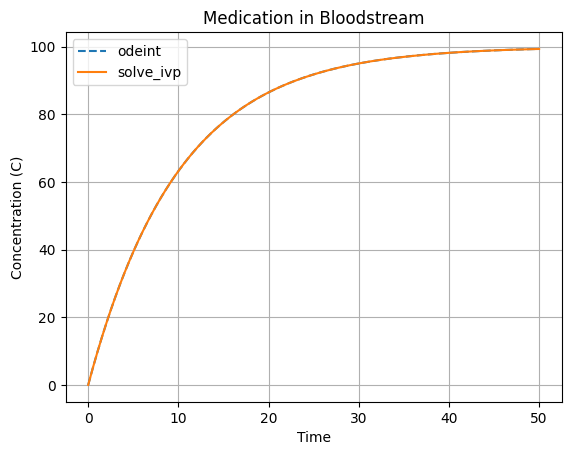

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

# Parameters
k = 0.1
D = 100
C0 = 0
t = np.linspace(0, 50, 100)

# Function for odeint
def model(C, t):
    return k * (D - C)

# Solve with odeint
sol1 = odeint(model, C0, t)

# Function for solve_ivp
def model_ivp(t, C):
    return k * (D - C)

# Solve with solve_ivp
sol2 = solve_ivp(model_ivp, [0, 50], [C0], t_eval=t)

# Plot both results
plt.plot(t, sol1, '--', label='odeint')
plt.plot(sol2.t, sol2.y[0], label='solve_ivp')
plt.xlabel('Time')
plt.ylabel('Concentration (C)')
plt.title('Medication in Bloodstream')
plt.legend()
plt.grid(True)
plt.show()